Code for examining how HMM performs under repeated recalibration


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import sys, glob
[sys.path.append(f) for f in glob.glob('../utils/*')]
from plotting_utils import figSize
from hmm import HMMRecalibration
import hmm_utils
from RTI_utils import RTI
import simulation_utils 
from simulation import simulateBCIFitts

# for a reproducible result
np.random.seed(1)

fig_path = '/home/users/ghwilson/projects/nonstationarities/figures/'
data_dir = '/oak/stanford/groups/shenoy/ghwilson/nonstationarities/simulator/efficiency/'

In [2]:
labels = ['supervised', 'HMM', 'Click HMM', 'RTI']

dicts = list()

for file in glob.glob(data_dir + '/*'):
    file_dict = np.load(file, allow_pickle = True)[0]
    
    for i, label in enumerate(labels):
        d = dict()
        d['ttt']       = file_dict['scores'][-1, i] 
        d['method']    = label
        d['nSimSteps'] = file_dict['nSimSteps']

        dicts.append(d)
        
df = pd.DataFrame(dicts)

## Vanilla HMM vs RTI comparisons

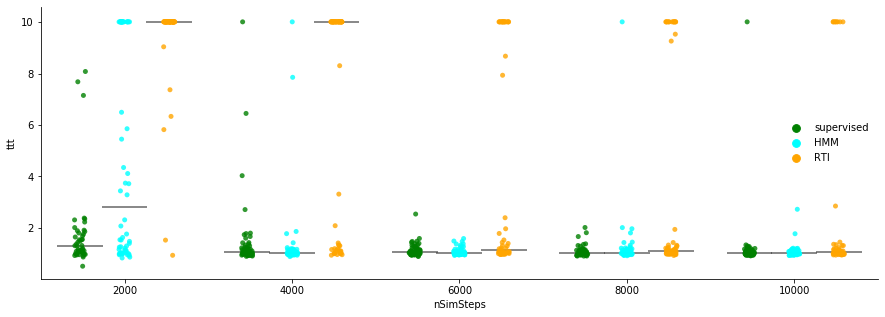

In [26]:
figSize(5, 15)

subset_labels = ['supervised', 'HMM', 'RTI']
colors = ['g', 'cyan', 'orange']
cmap   = dict(zip(subset_labels, colors))


scores_df = df[df['method'].isin(subset_labels)]

sns.stripplot(data = scores_df, x = 'nSimSteps', y = 'ttt', 
              hue = 'method', alpha = 0.8, palette = cmap, dodge = True)

ax = plt.gca()

sns.boxplot(medianprops={'ls': '-', 'lw': 2, 'alpha' : 0.6,}, whiskerprops={'visible': False},
            zorder=1, x="nSimSteps", y="ttt", hue='method', data=scores_df, 
            showfliers=False, showbox=False, showcaps=False, ax=ax)

#plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[3:],labels[3:], frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(fig_path + 'simulator/HMM_vs_RTI_efficiency', format = 'pdf')
plt.show()

In [25]:
import scipy.stats

for nSteps in [2000, 4000, 6000, 8000, 10000]:
    subset = scores_df[scores_df['nSimSteps'] == nSteps]
    
    print(' \n', 'Time (sec): ', 0.02 * nSteps)
    for i, method1 in enumerate(subset_labels):
        for j, method2 in enumerate(subset_labels):
            if i > j:
                stat = scipy.stats.wilcoxon(subset[subset['method'] == method1]['ttt'], subset[subset['method'] == method2]['ttt'])
                print(f'{method1} vs {method2}: p = ', stat)

 
 Time (sec):  40.0
HMM vs supervised: p =  WilcoxonResult(statistic=187.0, pvalue=8.356954160361806e-08)
RTI vs supervised: p =  WilcoxonResult(statistic=3.0, pvalue=1.8964365613380834e-11)
RTI vs HMM: p =  WilcoxonResult(statistic=4.0, pvalue=4.836242879123649e-08)
 
 Time (sec):  80.0
HMM vs supervised: p =  WilcoxonResult(statistic=753.0, pvalue=0.2330340253971983)
RTI vs supervised: p =  WilcoxonResult(statistic=139.0, pvalue=1.1124777049647846e-08)
RTI vs HMM: p =  WilcoxonResult(statistic=107.0, pvalue=2.711482443790718e-09)
 
 Time (sec):  120.0
HMM vs supervised: p =  WilcoxonResult(statistic=713.0, pvalue=0.13700324147532053)
RTI vs supervised: p =  WilcoxonResult(statistic=393.0, pvalue=0.00012166002632069078)
RTI vs HMM: p =  WilcoxonResult(statistic=299.0, pvalue=5.7672452031489865e-06)
 
 Time (sec):  160.0
HMM vs supervised: p =  WilcoxonResult(statistic=883.0, pvalue=0.813765349083316)
RTI vs supervised: p =  WilcoxonResult(statistic=419.0, pvalue=0.0002608602742080976

## Click HMM vs HMM comparisons

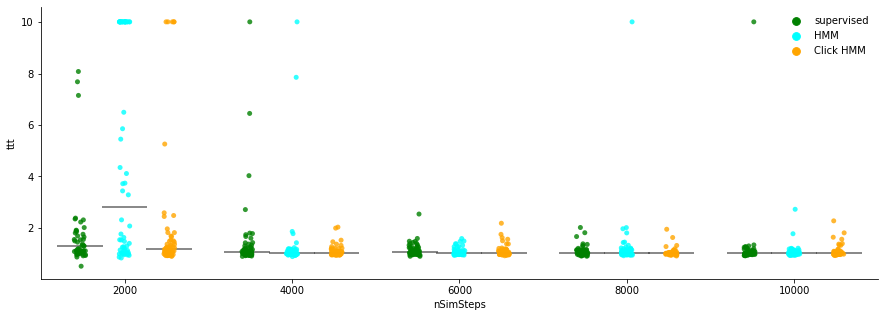

In [29]:
figSize(5, 15)

subset_labels = ['supervised', 'HMM', 'Click HMM']
colors = ['g', 'cyan', 'orange']
cmap   = dict(zip(subset_labels, colors))


scores_df = df[df['method'].isin(subset_labels)]

sns.stripplot(data = scores_df, x = 'nSimSteps', y = 'ttt', 
              hue = 'method', alpha = 0.8, palette = cmap, dodge = True)

ax = plt.gca()

sns.boxplot(medianprops={'ls': '-', 'lw': 2, 'alpha' : 0.6,}, whiskerprops={'visible': False},
            zorder=1, x="nSimSteps", y="ttt", hue='method', data=scores_df, 
            showfliers=False, showbox=False, showcaps=False, ax=ax)

#plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[3:],labels[3:], frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(fig_path + 'simulator/vanillaHMM_vs_clickHMM_efficiency', format = 'pdf')
plt.show()

In [30]:
import scipy.stats

for nSteps in [2000, 4000, 6000, 8000, 10000]:
    subset = scores_df[scores_df['nSimSteps'] == nSteps]
    
    print(' \n', 'Time (sec): ', 0.02 * nSteps)
    for i, method1 in enumerate(subset_labels):
        for j, method2 in enumerate(subset_labels):
            if i > j:
                stat = scipy.stats.wilcoxon(subset[subset['method'] == method1]['ttt'], subset[subset['method'] == method2]['ttt'])
                print(f'{method1} vs {method2}: p = ', stat)

 
 Time (sec):  40.0
HMM vs supervised: p =  WilcoxonResult(statistic=187.0, pvalue=8.356954160361806e-08)
Click HMM vs supervised: p =  WilcoxonResult(statistic=458.0, pvalue=0.0007675126926442101)
Click HMM vs HMM: p =  WilcoxonResult(statistic=328.0, pvalue=0.00012615533061524541)
 
 Time (sec):  80.0
HMM vs supervised: p =  WilcoxonResult(statistic=753.0, pvalue=0.2330340253971983)
Click HMM vs supervised: p =  WilcoxonResult(statistic=637.0, pvalue=0.04070468302098055)
Click HMM vs HMM: p =  WilcoxonResult(statistic=892.0, pvalue=0.8655474079727468)
 
 Time (sec):  120.0
HMM vs supervised: p =  WilcoxonResult(statistic=713.0, pvalue=0.13700324147532053)
Click HMM vs supervised: p =  WilcoxonResult(statistic=779.0, pvalue=0.3167407566408771)
Click HMM vs HMM: p =  WilcoxonResult(statistic=861.0, pvalue=0.6909792030868053)
 
 Time (sec):  160.0
HMM vs supervised: p =  WilcoxonResult(statistic=883.0, pvalue=0.813765349083316)
Click HMM vs supervised: p =  WilcoxonResult(statistic=712